In [23]:
import numpy as np
import matplotlib.pyplot as plt
t1_original = np.array([1529 for i in range(6)])
t1 = np.array([0.808,0.807,0.813,0.812,0.814,0.809]) + 1529
t2_original = np.array([1540 for i in range(6)])
t2 = np.array([0.095,0.092,0.09,0.093,0.094,0.091]) + 1540
t1, t1_original, t2, t2_original

(array([1529.808, 1529.807, 1529.813, 1529.812, 1529.814, 1529.809]),
 array([1529, 1529, 1529, 1529, 1529, 1529]),
 array([1540.095, 1540.092, 1540.09 , 1540.093, 1540.094, 1540.091]),
 array([1540, 1540, 1540, 1540, 1540, 1540]))

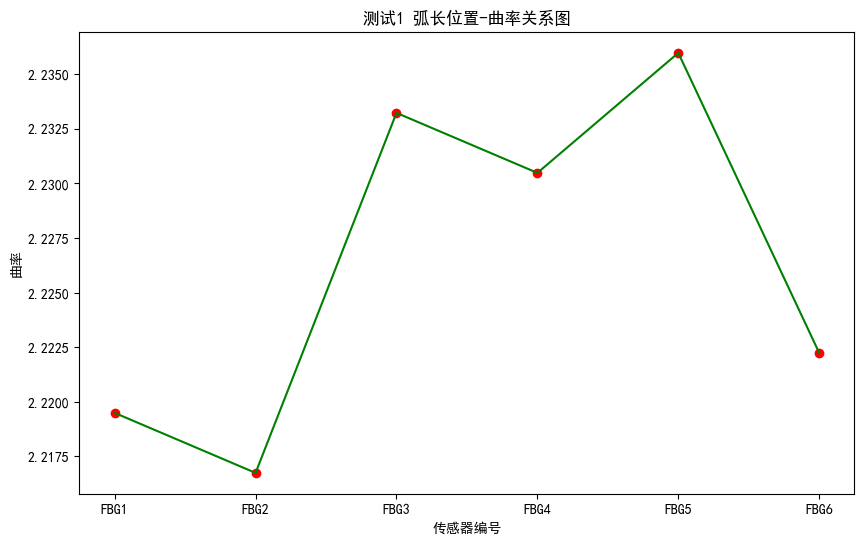

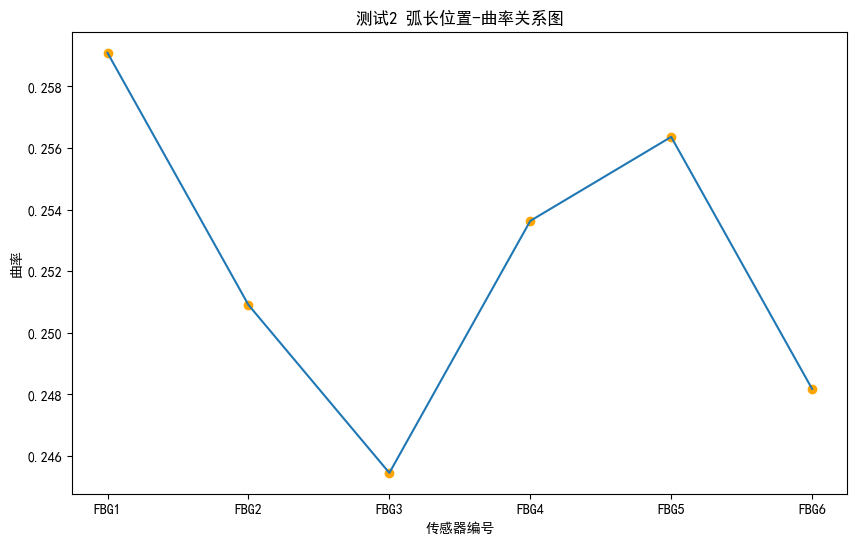

In [33]:
k1s = np.array([4200 * ((i / 1529) - 1) for i in t1])
k2s = np.array([4200 * ((i / 1540) - 1) for i in t2])
# 启用中文图例
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# 绘制FBG1至FBG6的位置-曲率关系图
x = ['FBG' + str(i) for i in range(1, 7)]
plt.figure(figsize=(10, 6))
plt.title('测试1 弧长位置-曲率关系图')
plt.xlabel('传感器编号')
plt.ylabel('曲率')
plt.plot(x, k1s, label='曲率',color='green')
plt.scatter(x, k1s,color='red',label='曲率')
plt.figure(figsize=(10, 6))
plt.title('测试2 弧长位置-曲率关系图')
plt.xlabel('传感器编号')
plt.ylabel('曲率')
plt.plot(x, k2s, label='曲率')
plt.scatter(x, k2s,color='orange',label='曲率') 
plt.show()

假设初始点坐标为原点，初始的
水平光纤方向为x轴，垂直方向为y轴，光纤在平面内受力后在初始位置的切线与水平方向的夹角为 45°，请建立模型估算下列表格中横坐标𝐀轴相应位置处的曲率。

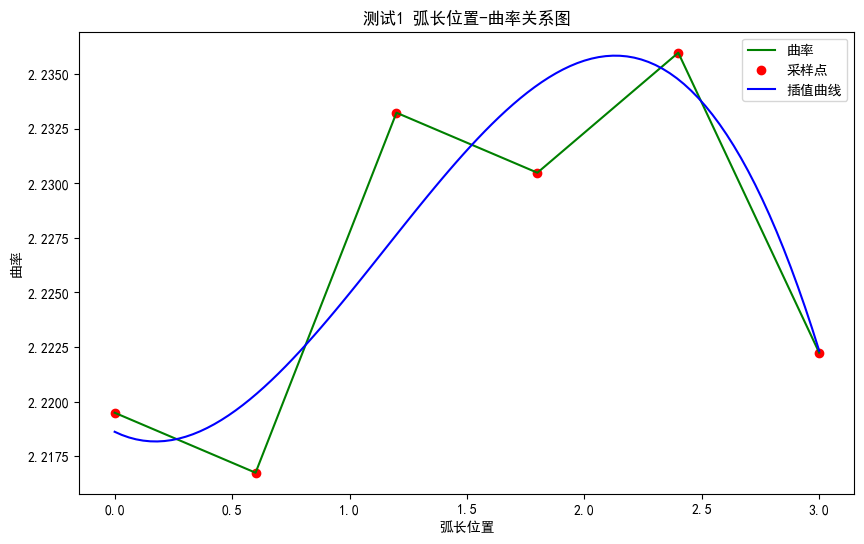

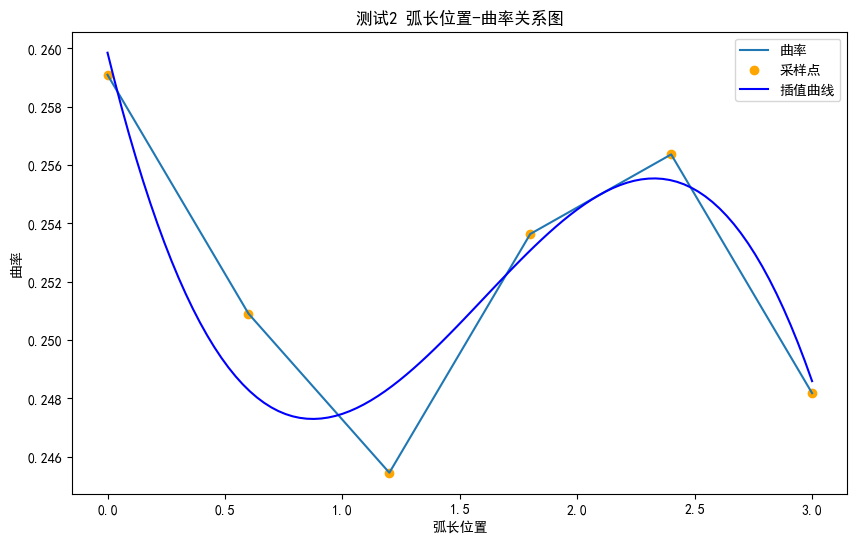

In [35]:
# 采用插值算法对曲率进行连续化，并根据初始条件进行优化
# 多项式插值
from numpy.polynomial.polynomial import Polynomial
x_points = np.array([0,0.6,1.2,1.8,2.4,3])
# 拟合三次多项式
p1 = Polynomial.fit(x_points,k1s, 3)
p2 = Polynomial.fit(x_points,k2s, 3)
# 生成插值点
new_x = np.linspace(0, 3, 100)
# 计算插值点的值
y1_poly = p1(new_x)
y2_poly = p2(new_x)
plt.figure(figsize=(10, 6))
plt.title('测试1 弧长位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(x_points, k1s, label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='采样点')
plt.plot(new_x, y1_poly, label='插值曲线',color='blue')
plt.legend()
plt.figure(figsize=(10, 6))
plt.title('测试2 弧长位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(x_points, k2s, label='曲率')
plt.scatter(x_points, k2s,color='orange',label='采样点')
plt.plot(new_x, y2_poly, label='插值曲线',color='blue')
plt.legend()
plt.show()



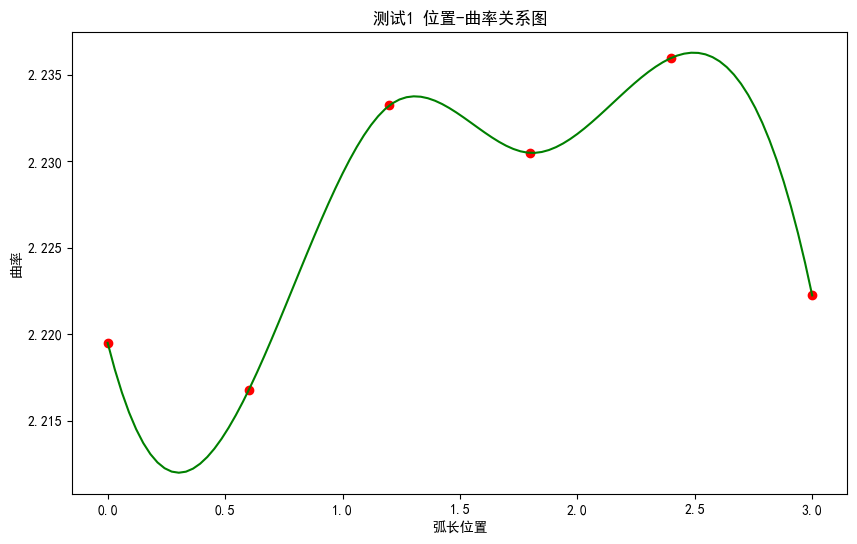

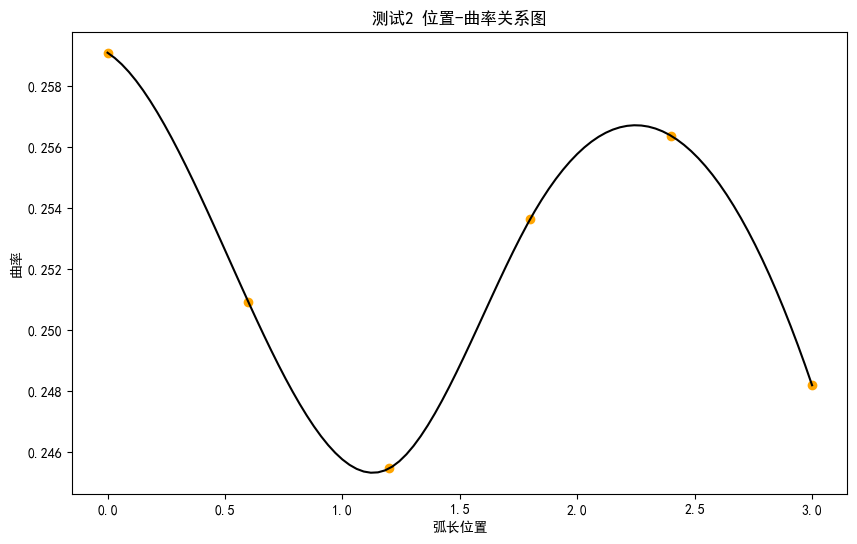

In [37]:
# 样条插值

from scipy.interpolate import CubicSpline
cs1 = CubicSpline(x_points, k1s)
cs2 = CubicSpline(x_points, k2s)
xnew = np.linspace(0, 3, 100)
plt.figure(figsize=(10, 6))
plt.title('测试1 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs1(xnew), label='曲率',color='green')
plt.scatter(x_points, k1s,color='red',label='曲率')
plt.figure(figsize=(10, 6))
plt.title('测试2 位置-曲率关系图')
plt.xlabel('弧长位置')
plt.ylabel('曲率')
plt.plot(xnew, cs2(xnew), label='曲率',color='black')
plt.scatter(x_points, k2s,color='orange',label='曲率')
plt.show()



In [ ]:
# 假设受曲线变形后为双曲线，反正切等，据此估算不同横坐标位置的曲率
